In [1]:
import torch 
import torch.nn as nn
import torch.functional as F 
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt 

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
print(f"Device : {device}")

Device : cuda


In [3]:
#Hyperparameters

num_epochs = 4
image_size = [32,32]
input_size = [3,32,32]
num_of_classes = 10
learning_rate = 0.001
batch_size = 8

In [4]:
#Transforms

data_transforms = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=data_transforms)
test_dataset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=data_transforms)

train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader =  DataLoader(test_dataset,batch_size=batch_size,shuffle=False)



dataiter = iter(train_loader)
data_batch = dataiter.next()

inputs,labels = data_batch
print(inputs.shape)
print(labels.shape)



Files already downloaded and verified
Files already downloaded and verified
torch.Size([8, 3, 32, 32])
torch.Size([8])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


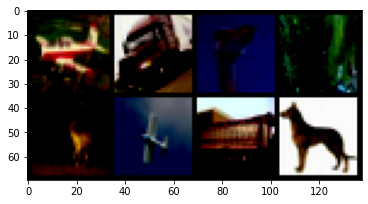

In [12]:
plt.imshow(torchvision.utils.make_grid(inputs,nrow=4).permute(1,2,0))

In [22]:
conv1 = nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5)
pool = nn.MaxPool2d(kernel_size=2,stride=2)
conv2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)

In [23]:
print(inputs.shape)
out = conv1(inputs)
print(out.shape)
out = pool(out)
print(out.shape)
out = conv2(out)
print(out.shape)
out = pool(out)
print(out.shape)


torch.Size([8, 3, 32, 32])
torch.Size([8, 6, 28, 28])
torch.Size([8, 6, 14, 14])
torch.Size([8, 12, 10, 10])
torch.Size([8, 12, 5, 5])
